- Pengubahan StandardScaler menjadi RobustScaler
- Train: 18 Sep 2012 - 18 Oct 2022
- Validation: 19 Oct 2022 - 25 Nov 2022

## Import Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import talib

def generate_TAs_features(df):
    """
    Function to generate Technical Analysis features:
    - MA (Moving Average)
    - RSI (Relative Strength Index)
    - MFI (Money Flow Index)
    """
    res = df.copy()
    for i in [7, 14, 21]:
        # Moving Average
        res[f'{i} DAYS MA'] = talib.MA(res['Close'], timeperiod=i)
        res[f'{i} DAYS MA'] = res[f'{i} DAYS MA'].shift(1)
        
        # RSI (Relative Strength Index)
        res[f'RSI {i}'] = talib.RSI(res['Close'], timeperiod=i)
        
        # MFI (Money Flow Index)
        res[f'MFI {i}'] = talib.MFI(res['High'], res['Low'], res['Close'], res['Volume'], timeperiod=i)
        
        # Standard Deviation
        if i == 7:
            res[f'{i} DAYS STD DEV'] = res['Close'].rolling(i).std()
            res[f'{i} DAYS STD DEV'] = res[f'{i} DAYS STD DEV'].shift(1)
    
    print(res.isnull().sum())
    res = res[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',            
               '7 DAYS MA', '14 DAYS MA', '21 DAYS MA', '7 DAYS STD DEV',
               'RSI 7', 'RSI 14', 'RSI 21',            
               'MFI 7', 'MFI 14', 'MFI 21']]
    res = res.dropna()
    return res

def generate_date_related_features(df):
    """
    Function to generate date related features
    """
    res = df.copy()
    res['dayofweek'] = df.index.dayofweek
    res['quarter'] = df.index.quarter
    res['month'] = df.index.month
    res['year'] = df.index.year
    res['dayofyear'] = df.index.dayofyear
    res['dayofmonth'] = df.index.day
    res['weekofyear'] = df.index.isocalendar().week
    return res

In [3]:
import yfinance as yf

In [4]:
df = yf.download('FREN.JK', start='2012-09-18', end='2022-11-25')
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-18,77.0,77.0,75.0,75.0,75.0,159226600
2022-11-21,75.0,76.0,75.0,75.0,75.0,78693100
2022-11-22,76.0,76.0,74.0,75.0,75.0,302536500
2022-11-23,76.0,76.0,74.0,75.0,75.0,146971600
2022-11-24,75.0,75.0,74.0,75.0,75.0,159852200


In [5]:
df.index = pd.to_datetime(df.index)

## Feature Extraction

In [6]:
df2 = generate_TAs_features(df)
df2.tail()

Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
7 DAYS MA          7
RSI 7              7
MFI 7              7
7 DAYS STD DEV     7
14 DAYS MA        14
RSI 14            14
MFI 14            14
21 DAYS MA        21
RSI 21            21
MFI 21            21
dtype: int64


,Open,High,Low,Close,Adj Close,Volume,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21
Date,,,,,,,,,,,,,,,,
2022-11-18,77.0,77.0,75.0,75.0,75.0,159226600,76.571429,76.785714,77.333333,1.618347,40.625179,42.973106,43.078662,6.435782e+01,53.255908,61.688387
2022-11-21,75.0,76.0,75.0,75.0,75.0,78693100,76.285714,76.571429,77.285714,1.704336,40.625179,42.973106,43.078662,7.295901e+01,52.309814,56.132322
2022-11-22,76.0,76.0,74.0,75.0,75.0,302536500,76.428571,76.357143,77.000000,1.511858,40.625179,42.973106,43.078662,4.158030e+01,50.955663,47.038047
2022-11-23,76.0,76.0,74.0,75.0,75.0,146971600,75.857143,76.214286,76.809524,1.069045,40.625179,42.973106,43.078662,-3.184453e-13,52.182442,51.186989
2022-11-24,75.0,75.0,74.0,75.0,75.0,159852200,75.428571,76.000000,76.714286,0.534522,40.625179,42.973106,43.078662,-3.733152e-13,50.384698,49.688510


In [7]:
df3 = generate_date_related_features(df2)
df3.tail()

,Open,High,Low,Close,Adj Close,Volume,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,...,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-18,77.0,77.0,75.0,75.0,75.0,159226600,76.571429,76.785714,77.333333,1.618347,...,6.435782e+01,53.255908,61.688387,4,4,11,2022,322,18,46
2022-11-21,75.0,76.0,75.0,75.0,75.0,78693100,76.285714,76.571429,77.285714,1.704336,...,7.295901e+01,52.309814,56.132322,0,4,11,2022,325,21,47
2022-11-22,76.0,76.0,74.0,75.0,75.0,302536500,76.428571,76.357143,77.000000,1.511858,...,4.158030e+01,50.955663,47.038047,1,4,11,2022,326,22,47
2022-11-23,76.0,76.0,74.0,75.0,75.0,146971600,75.857143,76.214286,76.809524,1.069045,...,-3.184453e-13,52.182442,51.186989,2,4,11,2022,327,23,47
2022-11-24,75.0,75.0,74.0,75.0,75.0,159852200,75.428571,76.000000,76.714286,0.534522,...,-3.733152e-13,50.384698,49.688510,3,4,11,2022,328,24,47


In [8]:
df4 = df3.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
df4.tail()

,Close,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,,,,,,
2022-11-18,75.0,76.571429,76.785714,77.333333,1.618347,40.625179,42.973106,43.078662,6.435782e+01,53.255908,61.688387,4,4,11,2022,322,18,46
2022-11-21,75.0,76.285714,76.571429,77.285714,1.704336,40.625179,42.973106,43.078662,7.295901e+01,52.309814,56.132322,0,4,11,2022,325,21,47
2022-11-22,75.0,76.428571,76.357143,77.000000,1.511858,40.625179,42.973106,43.078662,4.158030e+01,50.955663,47.038047,1,4,11,2022,326,22,47
2022-11-23,75.0,75.857143,76.214286,76.809524,1.069045,40.625179,42.973106,43.078662,-3.184453e-13,52.182442,51.186989,2,4,11,2022,327,23,47
2022-11-24,75.0,75.428571,76.000000,76.714286,0.534522,40.625179,42.973106,43.078662,-3.733152e-13,50.384698,49.688510,3,4,11,2022,328,24,47


In [9]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2508 entries, 2012-10-17 to 2022-11-24
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           2508 non-null   float64
 1   7 DAYS MA       2508 non-null   float64
 2   14 DAYS MA      2508 non-null   float64
 3   21 DAYS MA      2508 non-null   float64
 4   7 DAYS STD DEV  2508 non-null   float64
 5   RSI 7           2508 non-null   float64
 6   RSI 14          2508 non-null   float64
 7   RSI 21          2508 non-null   float64
 8   MFI 7           2508 non-null   float64
 9   MFI 14          2508 non-null   float64
 10  MFI 21          2508 non-null   float64
 11  dayofweek       2508 non-null   int64  
 12  quarter         2508 non-null   int64  
 13  month           2508 non-null   int64  
 14  year            2508 non-null   int64  
 15  dayofyear       2508 non-null   int64  
 16  dayofmonth      2508 non-null   int64  
 17  weekofyear     

In [10]:
df4['Close_'] = df4['Close']
df4 = df4.drop(['Close'], axis=1)
df4 = df4.rename(columns={'Close_': 'Close'})
df4.tail()

,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,,,,,,,
2022-11-18,76.571429,76.785714,77.333333,1.618347,40.625179,42.973106,43.078662,6.435782e+01,53.255908,61.688387,4,4,11,2022,322,18,46,75.0
2022-11-21,76.285714,76.571429,77.285714,1.704336,40.625179,42.973106,43.078662,7.295901e+01,52.309814,56.132322,0,4,11,2022,325,21,47,75.0
2022-11-22,76.428571,76.357143,77.000000,1.511858,40.625179,42.973106,43.078662,4.158030e+01,50.955663,47.038047,1,4,11,2022,326,22,47,75.0
2022-11-23,75.857143,76.214286,76.809524,1.069045,40.625179,42.973106,43.078662,-3.184453e-13,52.182442,51.186989,2,4,11,2022,327,23,47,75.0
2022-11-24,75.428571,76.000000,76.714286,0.534522,40.625179,42.973106,43.078662,-3.733152e-13,50.384698,49.688510,3,4,11,2022,328,24,47,75.0


## Data Standardization

### Standard Scaler

In [11]:
# standard_df = df4.copy()

In [12]:
# from sklearn.preprocessing import StandardScaler

In [13]:
# features_scaler = StandardScaler()
# features = standard_df.columns[:-1]
# standard_df[features] = features_scaler.fit_transform(standard_df[features])

In [14]:
# close_scaler = StandardScaler()
# standard_df['Close'] = close_scaler.fit_transform(np.array(standard_df['Close']).reshape(-1,1))

In [15]:
# standard_df.head()

### Robust Scaler

In [16]:
robust_df = df4.copy()

In [17]:
from sklearn.preprocessing import RobustScaler

In [18]:
features_scaler = RobustScaler()
features = robust_df.columns[:-1]
robust_df[features] = features_scaler.fit_transform(robust_df[features])

In [19]:
close_scaler = RobustScaler()
robust_df['Close'] = close_scaler.fit_transform(np.array(robust_df['Close']).reshape(-1,1))

In [20]:
robust_df.tail()

,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,,,,,,,
2022-11-18,0.014763,0.015142,0.013335,-0.035390,-0.131378,-0.158398,-0.217138,0.300043,0.022138,0.233412,1.0,0.5,0.666667,1.0,0.739541,0.133333,0.730769,-0.018405
2022-11-21,0.007382,0.009526,0.012084,-0.006935,-0.131378,-0.158398,-0.217138,0.457027,-0.002404,0.052308,-1.0,0.5,0.666667,1.0,0.755735,0.333333,0.769231,-0.018405
2022-11-22,0.011073,0.003910,0.004578,-0.070628,-0.131378,-0.158398,-0.217138,-0.115679,-0.037532,-0.244126,-0.5,0.5,0.666667,1.0,0.761134,0.400000,0.769231,-0.018405
2022-11-23,-0.003691,0.000166,-0.000426,-0.217159,-0.131378,-0.158398,-0.217138,-0.874579,-0.005708,-0.108888,0.0,0.5,0.666667,1.0,0.766532,0.466667,0.769231,-0.018405
2022-11-24,-0.014763,-0.005450,-0.002928,-0.394037,-0.131378,-0.158398,-0.217138,-0.874579,-0.052344,-0.157732,0.5,0.5,0.666667,1.0,0.771930,0.533333,0.769231,-0.018405


## Save Files

### Save scalers

In [21]:
from joblib import dump, load

In [22]:
dump(features_scaler, 'fren_features_scaler.bin', compress=True)

['fren_features_scaler.bin']

In [23]:
dump(close_scaler, 'fren_close_scaler.bin', compress=True)

['fren_close_scaler.bin']

In [24]:
test_loaded_sc = load('fren_close_scaler.bin')
test_loaded_sc.inverse_transform(np.array(robust_df['Close']).reshape(-1,1))[-1]

array([75.])

### Save .csv file

In [25]:
robust_df.to_csv('../cleaned_data/FREN.csv')

## EDA

In [26]:
import seaborn as sns
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


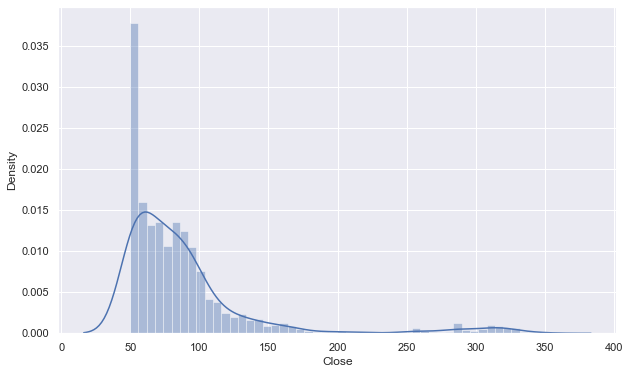

In [27]:
plt.figure(figsize=(10,6))
sns.distplot(df4['Close'])
plt.show()

In [28]:
# Correlation Coefficient
def plot_corr_coef(corr_data):
    mask = np.array(corr_data)
    mask[np.tril_indices_from(mask)] = False

    # create appropriate canvas
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)

    sns.heatmap(corr_data, mask=mask, vmax=.8, square=True, annot=True, ax = ax)

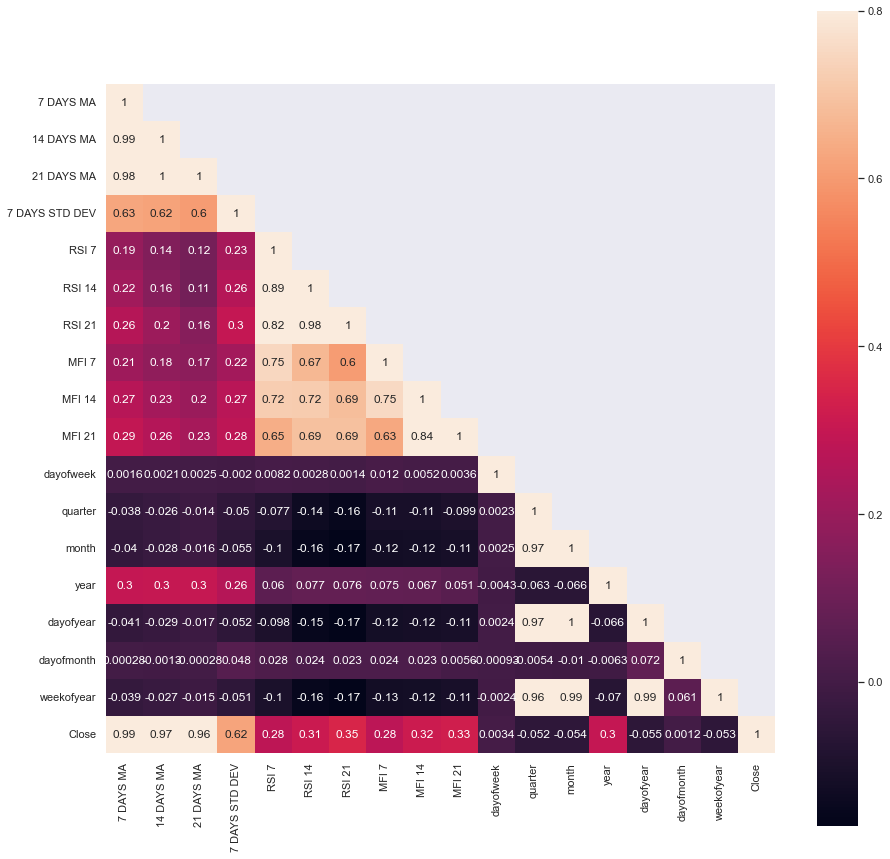

In [29]:
corr_data = robust_df.corr()
plot_corr_coef(corr_data)

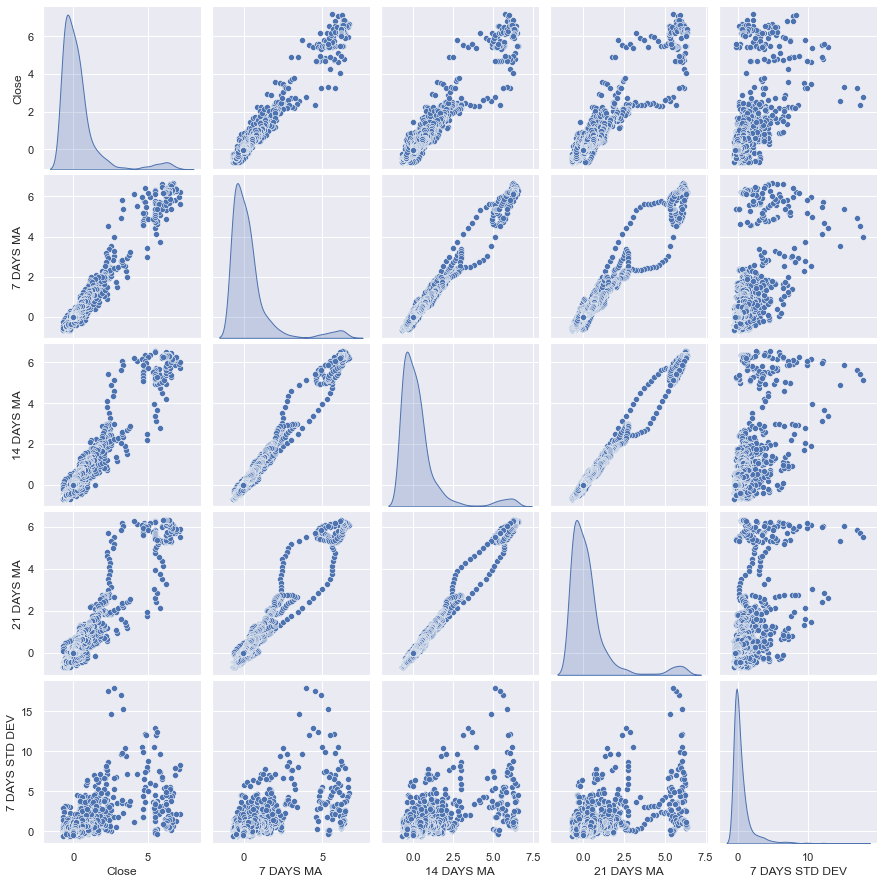

In [30]:
sns.pairplot(robust_df[['Close', '7 DAYS MA', '14 DAYS MA', '21 DAYS MA', '7 DAYS STD DEV']], diag_kind='kde')
plt.show()